# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Regresi pada dataset "Energy Efficiency" menggunakan regresi

<b>Kelompok 4: </b>

Anggota:
1. Cahaya Calida - 1301223201
2. Gisa Kayla Syahla - 1301223237
3. Purinda Kyla Larissa - 1301223289

#Pendahuluan
Dataset "Energy Efficiency" dimanfaatkan untuk memprediksi beban pemanasan (heating load) dan beban pendinginan (cooling load) bangunan. Data ini diproses secara cermat untuk menjamin akurasi prediksi.

Fitur-fitur dalam dataset diubah skalanya agar berada pada rentang nilai yang sama, dan data tersebut dibagi menjadi set pelatihan dan set pengujian dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Selain itu, kami juga melakukan percobaan dengan pembagian 60% untuk pelatihan dan 40% untuk pengujian.

Langkah ini memastikan bahwa model dapat dievaluasi dengan baik pada data yang belum pernah dilihat sebelumnya, sehingga menghasilkan prediksi yang lebih akurat.

In [ ]:
# Show your data in tabular or other visualization ways
# Data Preprocessing
# Data Splitting
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# @title Import Dataset
dataset = pd.read_csv('ENB2012_data.csv', encoding= 'latin1')
# @title Default title text
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [ ]:
# @title Cek Duplikat dan Drop Duplikat
duplicate_counts = dataset.duplicated().sum()
print('Jumlah data duplikat:', duplicate_counts)
dataset.drop_duplicates(inplace=True)

Jumlah data duplikat: 0


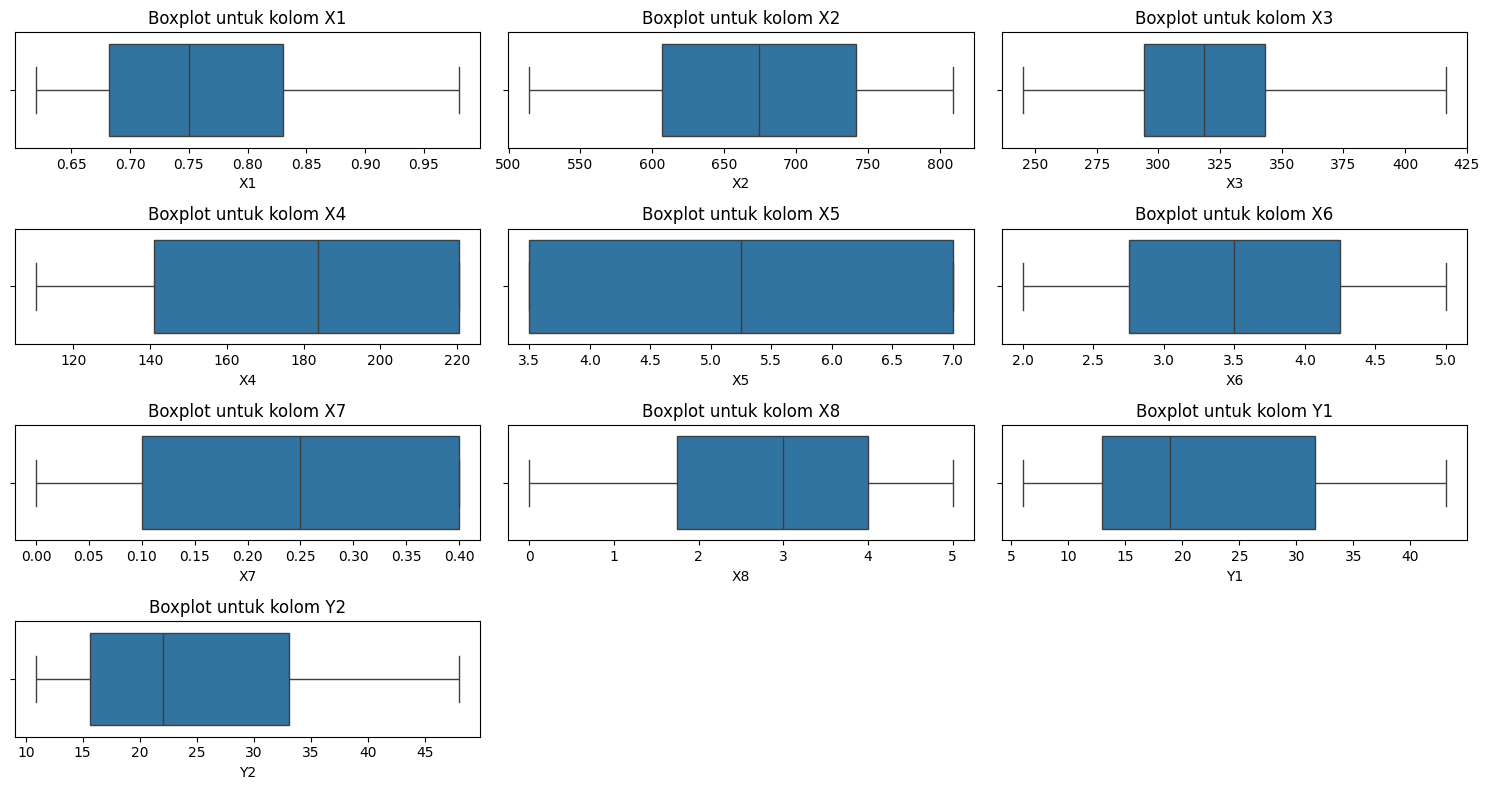

In [ ]:
# @title Mengecek outliers
num_cols = len(dataset.select_dtypes(include=['int', 'float']).columns)
plt.figure(figsize=(15, 8))
rows = (num_cols + 2) // 3
for i, col in enumerate(dataset.select_dtypes(include=['int', 'float']).columns):
  plt.subplot(rows, 3, i+1)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot untuk kolom {col}')
plt.tight_layout()
plt.show()

In [ ]:
# @title Menangani Outliers
# Mendeteksi dan menangani outlier menggunakan metode IQR
def handle_outliers(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
  return data

  for col in dataset.select_dtypes(include=['int', 'float']).columns:
    dataset = handle_outliers(dataset, col)

  print("Outliers berhasil ditangani")

In [ ]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# @title Membagi dataset menjadi X dan Y
X = dataset.iloc[:, :-2]
Y_heating = dataset.iloc[:, -2]
Y_cooling = dataset.iloc[:, -1]

In [ ]:
# @title Menampilkan beberapa baris pertama dari X
print("Head of X:")
print(X)

Head of X:
       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns]


In [ ]:
# @title Menampilkan beberapa baris pertama dari Y heating
print("Head of Y Heating:")
print(Y_heating)

Head of Y Heating:
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64


In [ ]:
# @title Menampilkan beberapa baris pertama dari Y Cooling
print("Head of Y Cooling:")
print(Y_cooling)

Head of Y Cooling:
0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Y2, Length: 768, dtype: float64


In [ ]:
dataset.nunique()

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    586
Y2    636
dtype: int64

In [ ]:
# @title Penskalaan Fitur (Feature Scalling)
#Agar perbedaan data tidak terlalu jauh
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
#Splitting Data Heating
from sklearn.model_selection import train_test_split

X_train_heating, X_test_heating, Y_train_heating, Y_test_heating = train_test_split(X, Y_heating, test_size=0.2, random_state=0)

# Print informasi tentang ukuran data latih dan data uji
print('Jumlah data latih X:', len(X_train_heating))
print('Jumlah data latih Y:', len(Y_train_heating))
print('Jumlah data uji X:', len(X_test_heating))
print('Jumlah data uji Y:', len(Y_test_heating))

Jumlah data latih X: 614
Jumlah data latih Y: 614
Jumlah data uji X: 154
Jumlah data uji Y: 154


In [ ]:
#Splitting Data Cooling
from sklearn.model_selection import train_test_split

X_train_cooling, X_test_cooling, Y_train_cooling, Y_test_cooling = train_test_split(X, Y_cooling, test_size=0.2, random_state=0)

# Print informasi tentang ukuran data latih dan data uji
print('Jumlah data latih X:', len(X_train_cooling))
print('Jumlah data latih Y:', len(Y_train_cooling))
print('Jumlah data uji X:', len(X_test_cooling))
print('Jumlah data uji Y:', len(Y_test_cooling))

Jumlah data latih X: 614
Jumlah data latih Y: 614
Jumlah data uji X: 154
Jumlah data uji Y: 154


#### Metode yang Digunakan
Metode yang kami gunakan pada dataset ini adalah regresi.
Pada percobaan ini kami menggunakan setting parameter default regresi linear : fit_intercept, normalize, copy_X, dan n_jobs

In [ ]:
# Experiment Settings
# Write your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib


In [ ]:
# Model Training
# Save the trained model
# Write your code here
#Model Heating
model_heating = LinearRegression()
model_heating.fit(X_train_heating, Y_train_heating)


LinearRegression()

In [ ]:
#Model Cooling
model_cooling = LinearRegression()
model_cooling.fit(X_train_cooling, Y_train_cooling)

LinearRegression()

In [ ]:
# Model Testing and Evaluation
# Show the performance
# Write your code here

#Model Heating
Y_pred_heating = model_heating.predict(X_test_heating)
mse = mean_squared_error(Y_test_heating, Y_pred_heating)
mae = mean_absolute_error(Y_test_heating, Y_pred_heating)
r2 = r2_score(Y_test_heating, Y_pred_heating)
train_score = model_heating.score(X_train_heating, Y_train_heating)
test_score = model_heating.score(X_test_heating, Y_test_heating)
print(f'Train Score Heating: {train_score}')
print(f'Test Score Heating: {test_score}')
print(f'Mean Squared Error Heating: {mse}')
print(f'Mean Absolute Error Heating: {mae}')
print(f'R^2 Score Heating: {r2}')

print(f'Intercept Heating : {model_heating.intercept_}')
print(f'Coefficients Heating : {model_heating.coef_}')

Train Score Heating: 0.924194412836203
Test Score Heating: 0.9031530948505799
Mean Squared Error Heating: 9.762342769707956
Mean Absolute Error Heating: 2.228396551891573
R^2 Score Heating: 0.9031530948505799
Intercept Heating : 22.391654048904208
Coefficients Heating : [-6.03813717 -3.21159196  0.82333562 -3.52938327  7.53403845 -0.0980379
  2.5275844   0.28187318]


In [ ]:
#Model Cooling
Y_pred_cooling = model_cooling.predict(X_test_cooling)
mse = mean_squared_error(Y_test_cooling, Y_pred_cooling)
mae = mean_absolute_error(Y_test_cooling, Y_pred_cooling)
r2 = r2_score(Y_test_cooling, Y_pred_cooling)
train_score = model_cooling.score(X_train_cooling, Y_train_cooling)
test_score = model_cooling.score(X_test_cooling, Y_test_cooling)
print(f'Train Score Cooling: {train_score}')
print(f'Test Score Cooling: {test_score}')
print(f'Mean Squared Error Cooling: {mse}')
print(f'Mean absolute Error Cooling: {mae}')
print(f'R^2 Score Cooling: {r2}')


print(f'Intercept Cooling : {model_cooling.intercept_}')
print(f'Coefficients Cooling : {model_cooling.coef_}')

Train Score Cooling: 0.8874268785561396
Test Score Cooling: 0.8870166031575037
Mean Squared Error Cooling: 9.792282680941678
Mean absolute Error Cooling: 2.2078986803479217
R^2 Score Cooling: 0.8870166031575037
Intercept Cooling : 24.754423136820805
Coefficients Cooling : [-6.87960377 -3.46424615  0.11886166 -3.43552502  7.89828392  0.14325678
  1.85567483  0.02686236]


# Hasil dan Analisis
Dapat dilihat dari peforma yg dihasilkan berdasarkan grafik scatterplot dibawah, peforma evaluasi dan testing menghasilkan peforma yang baik dan akurat. Dengan mengatur test-size menjadi 0.2 kami memperoleh train score heating :  0.9179568865292521 dan test score-nya : 0.9085551235120666, sedangkan train score cooling : 0.8880538985731498 dan test score-nya : 0.8862270316975983.

Lalu kami mengubah test size menjadi 0.4 , kami memperoleh train score heating : 0.924194412836203 dan test score-nya :  0.9031530948505799, sedangkan untuk train score cooling : 0.8874268785561396 dan test score-nya : 0.8870166031575037.

Berdasarkan analisis, dengan test-size 0.4 menunjukkan kinerja yang baik dengan konsistensi antara "train score" dan "test score", serta memberikan gambaran yang lebih akurat tentang kinerja model pada data yang belum pernah dilihat sebelumnya.

Dengan proporsi data pengujian yang lebih besar, ukuran tes yang lebih besar membantu mengurangi risiko overfitting. Oleh karena itu, ukuran tes 0.4 mungkin menjadi pilihan yang lebih aman daripada ukuran tes 0.2.

##mse dan mae
Dalam analisis dataset energy efficiency, model regresi diuji dengan 2 test size t: 0.2 dan 0.4. Untuk test size 0.2, MSE dan MAE untuk prediksi Heating adalah 10.0979 dan 2.2221, sedangkan untuk Cooling adalah 9.7923 dan 2.2079. Untuk test size 0.4, MSE untuk Heating sedikit lebih rendah pada 9.7623 dengan MAE hampir sama yaitu 2.2284. MSE dan MAE untuk Cooling tetap tidak berubah pada 9.7923 dan 2.2079.

Secara keseluruhan, perbedaan kinerja untuk prediksi Heating antara kedua ukuran test size tidak signifikan, meskipun ada sedikit peningkatan dalam MSE dengan ukuran test size yang lebih besar. Untuk Cooling, kinerja model stabil dengan nilai metrik yang sama untuk kedua ukuran test size. Hal ini menunjukkan bahwa model regresi yang digunakan cukup tahan terhadap perubahan ukuran test size dan mampu memberikan hasil yang konsisten dalam dataset ini.


Text(0.5, 1.0, 'Heating Load Prediction')

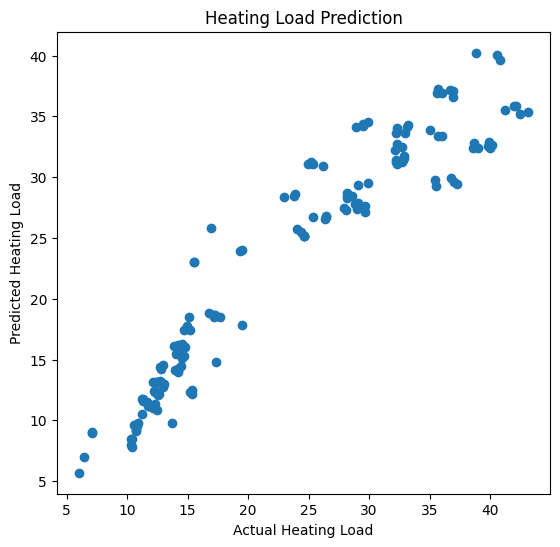

In [ ]:
# Visualisasi
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_test_heating, Y_pred_heating)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Heating Load Prediction')

Text(0.5, 1.0, 'Cooling Load Prediction')

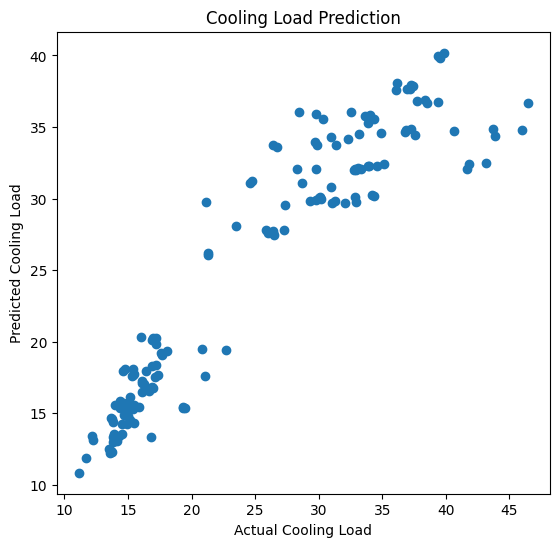

In [ ]:
# Visualisasi
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_test_cooling, Y_pred_cooling)
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Cooling Load Prediction')

In [ ]:
# @title Contoh Eksperimen lain dengan test_size berbeda
#Splitting Data Heating
from sklearn.model_selection import train_test_split

X_train_heating, X_test_heating, Y_train_heating, Y_test_heating = train_test_split(X, Y_heating, test_size=0.4, random_state=0)

# Print informasi tentang ukuran data latih dan data uji
print('Jumlah data latih X:', len(X_train_heating))
print('Jumlah data latih Y:', len(Y_train_heating))
print('Jumlah data uji X:', len(X_test_heating))
print('Jumlah data uji Y:', len(Y_test_heating))

Jumlah data latih X: 460
Jumlah data latih Y: 460
Jumlah data uji X: 308
Jumlah data uji Y: 308


In [ ]:
#Splitting Data Cooling
from sklearn.model_selection import train_test_split

X_train_cooling, X_test_cooling, Y_train_cooling, Y_test_cooling = train_test_split(X, Y_cooling, test_size=0.4, random_state=0)

# Print informasi tentang ukuran data latih dan data uji
print('Jumlah data latih X:', len(X_train_cooling))
print('Jumlah data latih Y:', len(Y_train_cooling))
print('Jumlah data uji X:', len(X_test_cooling))
print('Jumlah data uji Y:', len(Y_test_cooling))

Jumlah data latih X: 460
Jumlah data latih Y: 460
Jumlah data uji X: 308
Jumlah data uji Y: 308


In [ ]:
# Experiment Settings
# Write your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [ ]:
# Model Training
# Save the trained model
# Write your code here
#Model Heating
model_heating = LinearRegression()
model_heating.fit(X_train_heating, Y_train_heating)


LinearRegression()

In [ ]:
#Model Cooling
model_cooling = LinearRegression()
model_cooling.fit(X_train_cooling, Y_train_cooling)

LinearRegression()

In [ ]:
# Model Testing and Evaluation
# Show the performance
# Write your code here

#Model Heating
Y_pred_heating = model_heating.predict(X_test_heating)
mse = mean_squared_error(Y_test_heating, Y_pred_heating)
mae = mean_absolute_error(Y_test_heating, Y_pred_heating)
r2 = r2_score(Y_test_heating, Y_pred_heating)
train_score = model_heating.score(X_train_heating, Y_train_heating)
test_score = model_heating.score(X_test_heating, Y_test_heating)
print(f'Train Score Heating: {train_score}')
print(f'Test Score Heating: {test_score}')
print(f'Mean Squared Error Heating: {mse}')
print(f'Mean Absolute Error Heating: {mae}')
print(f'R^2 Score Heating: {r2}')

print(f'Intercept Heating : {model_heating.intercept_}')
print(f'Coefficients Heating : {model_heating.coef_}')

Train Score Heating: 0.924194412836203
Test Score Heating: 0.9031530948505799
Mean Squared Error Heating: 9.762342769707956
Mean Absolute Error Heating: 2.228396551891573
R^2 Score Heating: 0.9031530948505799
Intercept Heating : 22.391654048904208
Coefficients Heating : [-6.03813717 -3.21159196  0.82333562 -3.52938327  7.53403845 -0.0980379
  2.5275844   0.28187318]


In [ ]:
#Model Cooling
Y_pred_cooling = model_cooling.predict(X_test_cooling)
mse = mean_squared_error(Y_test_cooling, Y_pred_cooling)
mae = mean_absolute_error(Y_test_cooling, Y_pred_cooling)
r2 = r2_score(Y_test_cooling, Y_pred_cooling)
train_score = model_cooling.score(X_train_cooling, Y_train_cooling)
test_score = model_cooling.score(X_test_cooling, Y_test_cooling)
print(f'Train Score Cooling: {train_score}')
print(f'Test Score Cooling: {test_score}')
print(f'Mean Squared Error Cooling: {mse}')
print(f'Mean Absolute Error Cooling: {mae}')
print(f'R^2 Score Cooling: {r2}')

print(f'Intercept Cooling : {model_cooling.intercept_}')
print(f'Coefficients Cooling : {model_cooling.coef_}')

Train Score Cooling: 0.8874268785561396
Test Score Cooling: 0.8870166031575037
Mean Squared Error Cooling: 9.792282680941678
Mean Absolute Error Cooling: 2.2078986803479217
R^2 Score Cooling: 0.8870166031575037
Intercept Cooling : 24.754423136820805
Coefficients Cooling : [-6.87960377 -3.46424615  0.11886166 -3.43552502  7.89828392  0.14325678
  1.85567483  0.02686236]


Text(0.5, 1.0, 'Heating Load Prediction')

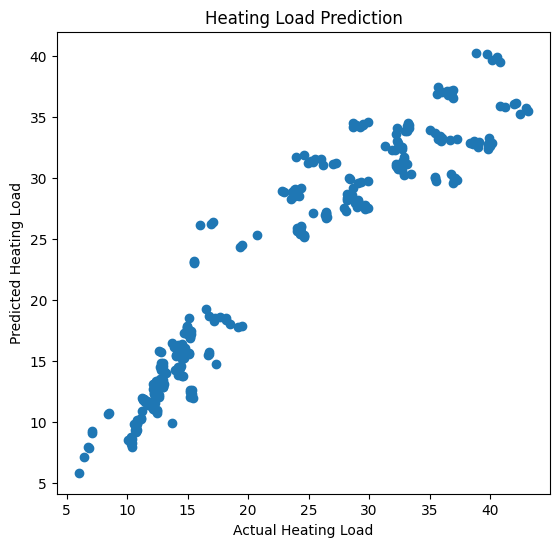

In [ ]:
# Visualisasi
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_test_heating, Y_pred_heating)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Heating Load Prediction')

Text(0.5, 1.0, 'Cooling Load Prediction')

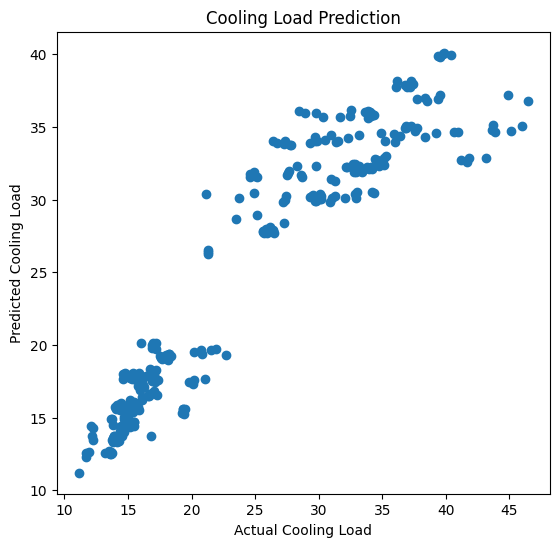

In [ ]:
# Visualisasi
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_test_cooling, Y_pred_cooling)
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Cooling Load Prediction')

#### Kesimpulan

Berdasarkan hasil percobaan yang telah kami lakukan , penerapan motion learning dalam konteks regresi pada dataset Energy Efficiency menggunakan metode regresi linear membuktikan prediksi yang akurat.kami melakukan evaluasi menggunakan 2 test size, yaitu 0.2 dan 0.4. Nilai "train score" dan "test score" yang tinggi pada kedua ukuran test size, menunjukkan konsistensi dan keandalan model. Selain itu, analisis pola pada scatterplot menunjukkan prediksi yang mendekati nilai aktual, mengonfirmasi kinerja yang baik dari model.

Dalam penelitian ini, nilai Mean Squared Error (MSE) dan Mean Absolute Error (MAE) untuk prediksi Heating dan Cooling memberikan gambaran yang konsisten. Meskipun ada sedikit perbedaan dalam MSE antara ukuran test size yang berbeda, namun perbedaan ini tidak signifikan secara statistik. Hal yang sama berlaku untuk nilai MAE, yang menunjukkan kestabilan kinerja model dalam memprediksi kedua variabel target.

Secara keseluruhan, temuan kami menunjukkan bahwa penerapan model regresi linear dalam konteks ini memberikan hasil yang konsisten dan dapat diandalkan. Meskipun terdapat variasi dalam ukuran test size, model tetap mampu memberikan prediksi yang akurat untuk kedua variabel target, Heating dan Cooling. Hal ini menegaskan bahwa model yang digunakan cukup tangguh terhadap perubahan ukuran test size dan mampu menghasilkan hasil yang konsisten dalam dataset ini.